Plotting from: 
['./outputs/plot_data_2023.csv', './outputs/plot_data_3523.csv', './outputs/plot_data_3523.csv']
Creating ./graphs/plot__2023__3523__3523 ...


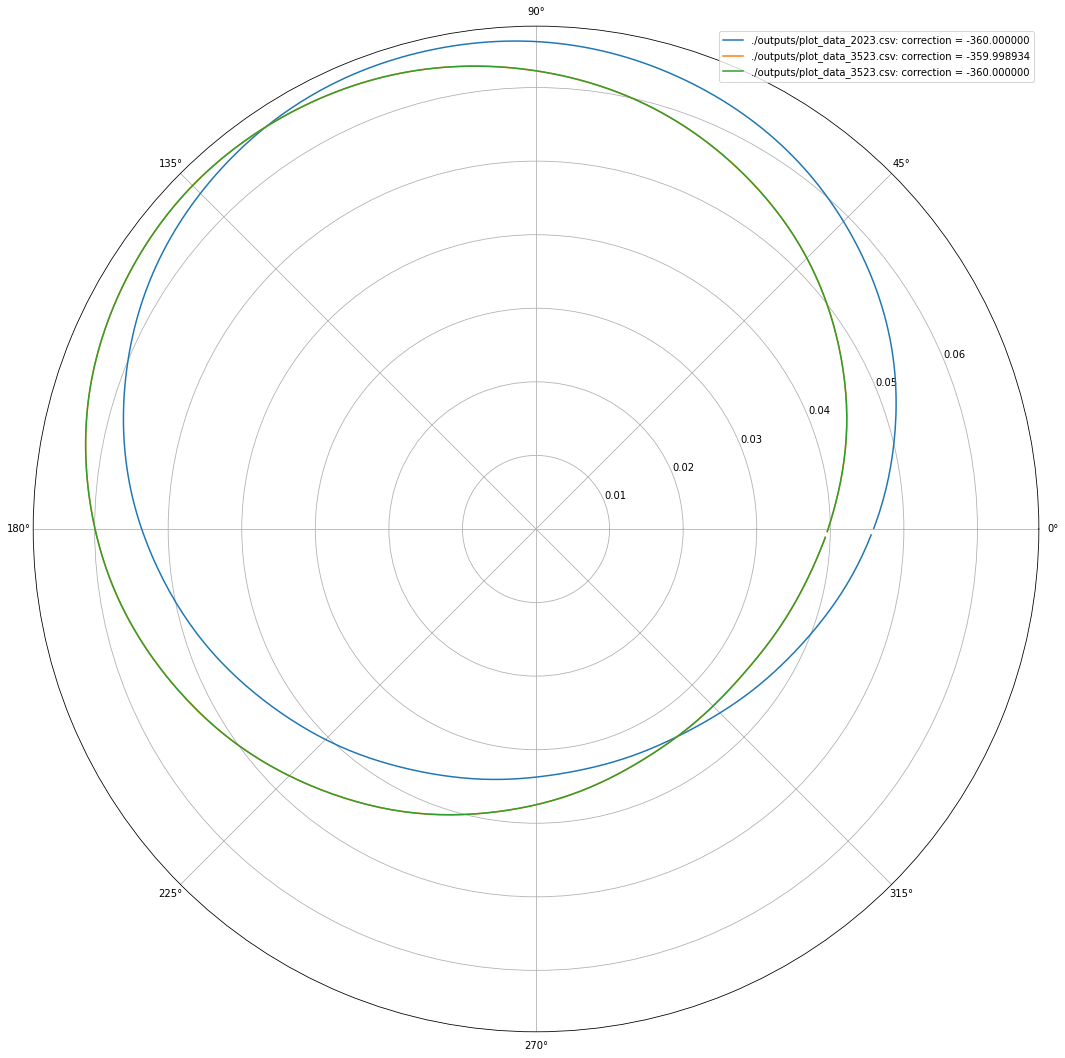

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from date_list_generator import m
from PIL import Image

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

d2r = np.pi/180
r0 = 0.95

with open("./outputs/plot_list.txt") as file:
    lines = [line.rstrip() for line in file]

print("Plotting from: ")
print(lines)

plt.figure(figsize=(10,10))

plotfilename = "./graphs/plot"

corrections =[0, (11.45/3600), 0]

for i in range(len(lines)):
    line = lines[i]
    c = corrections[i]
    plot_data = pd.read_csv(line)

    thetas = plot_data['theta']
    rs = plot_data['r']
    # print(line[-8:-4])
    plt.polar(thetas*d2r-c*d2r, rs-r0, label="%s: correction = %f"%(line, c%360-360))
    plotfilename = plotfilename + '_' + line[-9:-4]

print("Creating %s ..."%plotfilename)

fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
img = fig2img(fig)
img.save('%s.png'%plotfilename)

plt.legend()
plt.show()

In [188]:

print(36000-35999.050340)
print(1-0.010000263801409517)
print(3.8387/3600)

0.9496599999984028
0.9899997361985905
0.0010663055555555556


[-0.00493146  0.00506881  0.01506907  0.02506934  0.0350696   0.04506986]
-0.0049314556445074825
0.010000263801409517
0.010000263802300426
0.01000026380319189
0.010000263804083902
0.010000263804976484


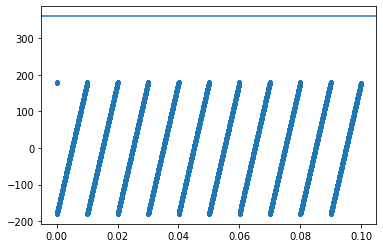

In [179]:
from scipy.optimize import fsolve

X1 = lambda t: (357.52772 + 35999.050340*t - 0.0001603*t**2 - (t**3)/300000)%360-180

print(fsolve(X1, [0, 0.01, 0.02, 0.03, 0.04, 0.05]))
t=0
for s in fsolve(X1, [0, 0.01, 0.02, 0.03, 0.04, 0.05]):
    print(s-t)
    t = s

times = np.linspace(0, 0.1, 100000)

plt.axhline(360)

plt.plot(times, X1(times), '.')
plt.show()

In [202]:
print(11.45/3600)
print(360/112000)

0.0031805555555555554
0.0032142857142857142
